# **Predicting Cancer Mortality Rates in US Counties**

The dataset comprises data collected from multiple counties in the US. The regression task for this project is to predict cancer mortality rates in "unseen" US counties, given some training data. The training data ('Training_data.csv') comprises various features/predictors related to socio-economic characteristics, amongst other types of information for specific counties in the country. The corresponding target variables for the training set are provided in a separate CSV file ('Training_data_targets.csv').

The list of predictors/features available in this data set are described below:

**Data Dictionary**

avgAnnCount: Mean number of reported cases of cancer diagnosed annually

avgDeathsPerYear: Mean number of reported mortalities due to cancer

incidenceRate: Mean per capita (100,000) cancer diagoses

medianIncome: Median income per county 

popEst2015: Population of county 

povertyPercent: Percent of populace in poverty 

MedianAge: Median age of county residents 

MedianAgeMale: Median age of male county residents 

MedianAgeFemale: Median age of female county residents 

AvgHouseholdSize: Mean household size of county 

PercentMarried: Percent of county residents who are married 

PctNoHS18_24: Percent of county residents ages 18-24 highest education attained: less than high school 

PctHS18_24: Percent of county residents ages 18-24 highest education attained: high school diploma 

PctSomeCol18_24: Percent of county residents ages 18-24 highest education attained: some college 

PctBachDeg18_24: Percent of county residents ages 18-24 highest education attained: bachelor's degree 

PctHS25_Over: Percent of county residents ages 25 and over highest education attained: high school diploma 

PctBachDeg25_Over: Percent of county residents ages 25 and over highest education attained: bachelor's degree 

PctEmployed16_Over: Percent of county residents ages 16 and over employed 

PctUnemployed16_Over: Percent of county residents ages 16 and over unemployed 

PctPrivateCoverage: Percent of county residents with private health coverage 

PctPrivateCoverageAlone: Percent of county residents with private health coverage alone (no public assistance) 

PctEmpPrivCoverage: Percent of county residents with employee-provided private health coverage 

PctPublicCoverage: Percent of county residents with government-provided health coverage 

PctPubliceCoverageAlone: Percent of county residents with government-provided health coverage alone 

PctWhite: Percent of county residents who identify as White 

PctBlack: Percent of county residents who identify as Black 

PctAsian: Percent of county residents who identify as Asian 

PctOtherRace: Percent of county residents who identify in a category which is not White, Black, or Asian 

PctMarriedHouseholds: Percent of married households 

BirthRate: Number of live births relative to number of women in county 

In [1]:
import os
import pandas as pd
from IPython.display import Markdown

root_dir = './'
local_path = 'Data-for-students-regression/'

data_dir = root_dir + local_path
print(data_dir)
## Define paths to the training data and targets files
training_data_path = data_dir + 'Training_data.csv'
training_targets_path = data_dir + 'Training_data_targets.csv'

./Data-for-students-regression/


In [2]:
import pandas as pd

# Read in the training data and targets
training_df = pd.read_csv(training_data_path)
training_targets_df = pd.read_csv(training_targets_path)

The above code reads in the training and target data files as data frames using the read_csv() method. 

The training_df dataframe contains the features for the training set, while the training_targets_df dataframe contains the target variables for the training set.

In [3]:
#Display first few rows of training_df
training_df.head()

,avgAnnCount,avgDeathsPerYear,incidenceRate,medIncome,popEst2015,povertyPercent,studyPerCap,MedianAge,MedianAgeMale,MedianAgeFemale,...,PctPrivateCoverageAlone,PctEmpPrivCoverage,PctPublicCoverage,PctPublicCoverageAlone,PctWhite,PctBlack,PctAsian,PctOtherRace,PctMarriedHouseholds,BirthRate
0,59.0,30,404.3,33975,8251,20.5,0.0,51.3,50.8,51.9,...,NaN,26.0,49.7,20.6,96.684036,0.438181,0.082899,0.272383,51.926207,5.041436
1,114.0,41,403.8,47363,22702,13.8,0.0,40.8,39.8,42.7,...,56.5,46.8,31.6,13.0,92.295459,2.102845,0.609648,0.879131,50.949545,6.329661
2,33.0,11,352.0,77222,9899,6.8,0.0,38.1,36.9,39.8,...,65.4,54.3,18.2,8.6,95.690422,0.000000,0.523871,0.118612,64.532156,5.148130
3,254.0,100,429.6,80650,48904,7.5,0.0,43.5,42.7,44.1,...,64.2,55.6,28.8,13.5,89.606996,7.407407,0.870370,0.450617,62.344481,5.627462
4,75.0,32,407.5,42839,22255,14.6,0.0,31.1,30.2,31.6,...,50.7,46.5,26.8,18.1,79.587990,2.948701,8.482564,5.637090,63.005948,10.436469


In [4]:
#Display quick summary of the training dataset
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              2438 non-null   float64
 1   avgDeathsPerYear         2438 non-null   int64  
 2   incidenceRate            2438 non-null   float64
 3   medIncome                2438 non-null   int64  
 4   popEst2015               2438 non-null   int64  
 5   povertyPercent           2438 non-null   float64
 6   studyPerCap              2438 non-null   float64
 7   MedianAge                2438 non-null   float64
 8   MedianAgeMale            2438 non-null   float64
 9   MedianAgeFemale          2438 non-null   float64
 10  AvgHouseholdSize         2438 non-null   float64
 11  PercentMarried           2438 non-null   float64
 12  PctNoHS18_24             2438 non-null   float64
 13  PctHS18_24               2438 non-null   float64
 14  PctSomeCol18_24         

We can see that there are 31 columns with the datatypes 'float64' or 'int64', that is, no columns in the training_df dataframe contain categorical data. 

As the counts don't match the overall row count, we also notice that three columns have missing values.

In [5]:
#Display quick summary of the training targets dataframe
training_targets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2438 entries, 0 to 2437
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   TARGET_deathRate  2438 non-null   float64
dtypes: float64(1)
memory usage: 19.2 KB


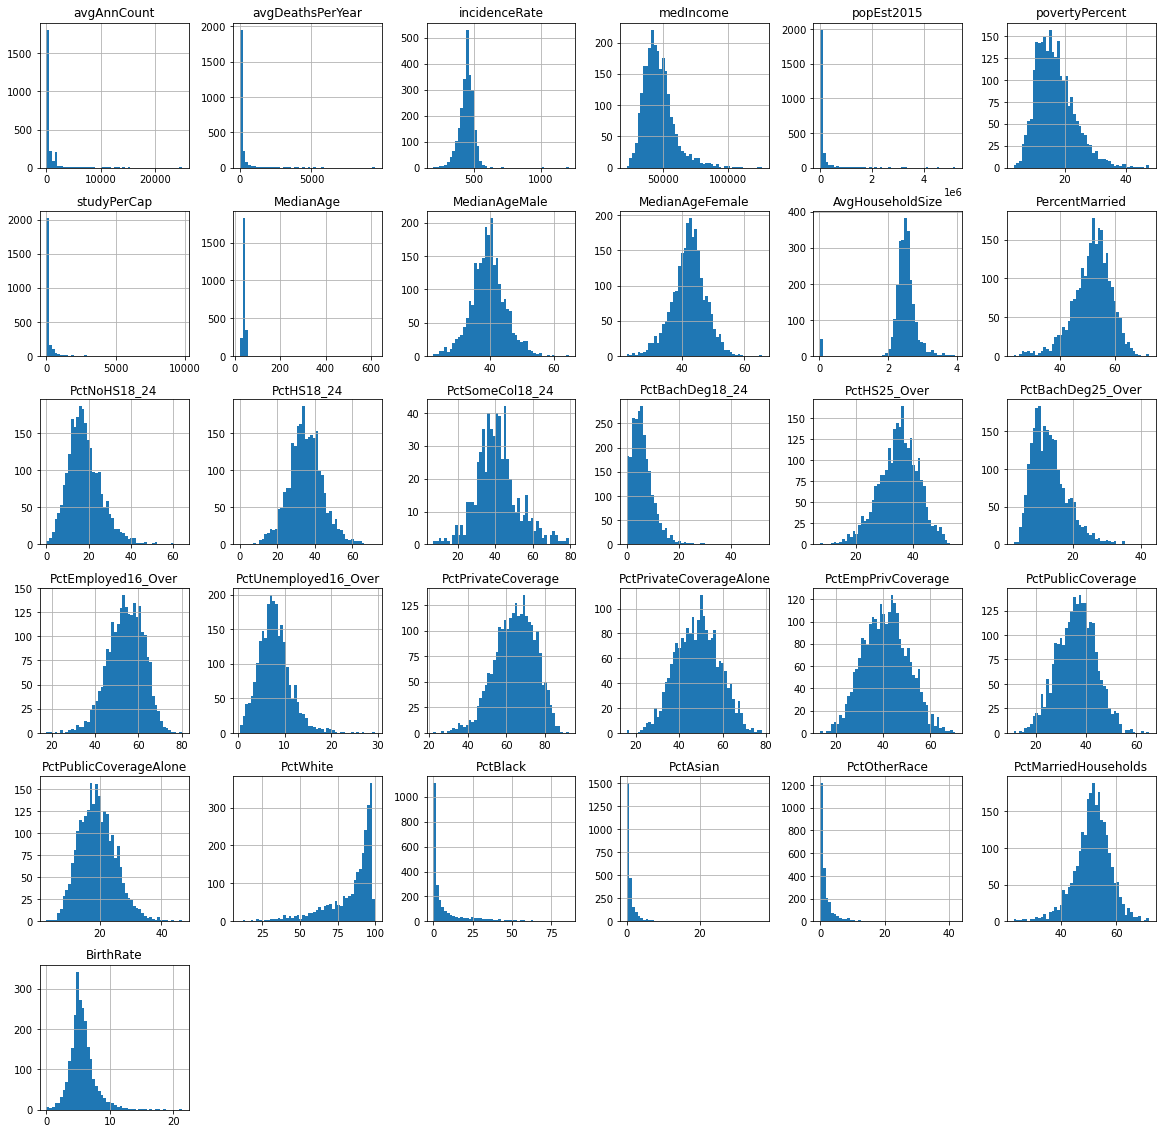

In [6]:
#Plot histograms of all features to visualise their distributions and identify outliers
%matplotlib inline
import matplotlib.pyplot as plt

training_df.hist(bins=50,figsize=(20,20))
plt.show()

In [7]:
len(training_df[training_df['MedianAge'] >= 300])

26

In [8]:
len(training_df[training_df['AvgHouseholdSize'] < 1])

48

#### Observations from the histograms

The observations from the histograms are as follows:

1.	**Shape of the Distribution:** Most of the features in the dataset exhibit a symmetric or bell-shaped distribution. However, there are a few features which are skewed to the left or right. For instance, **PctBachDeg18_24, PctBlack, PctAsian, PctOtherRace** are skewed to the right, indicating a higher concentration of higher values. On the other hand, **PctWhite** is skewed to the left, suggesting a higher concentration of lower values.

2.	**Unusual values:** We can also notice some unusual values for some of the features. For example, **AvgHouseholdSize** which is the mean household size of a county has 48 rows with values less than 1. This is unusual as household sizes are typically represented by values greater than or equal to 1. These values that are less than 1 could be an error or a data quality issue. Similarly, **MedianAge** which is the median age of county residents, has 26 rows with values greater than 300. MedianAge values greater than 300 are not realistic or feasible in the context of county residents' ages. These values are likely errors or outliers and suggest a data quality issue.

3.	**Outliers:** The histograms show the presence of outliers in some of the features, such as **avgAnnCount, avgDeathsPerYear, popEst2015, studyPerCap, MedianAge, AvgHouseholdSize, PctBlack, PctAsian, and PctOtherRace**. Outliers are data points in the histogram which deviate greatly from the majority of the data and may have an impact on the analysis.

In [9]:
# Concatenate the data and targets dataframes
training_all_df = pd.concat([training_df, training_targets_df], axis=1)

#Find correlation of all features with the target variable and sort according to the strength of correlations
corr_matrix = training_all_df.corr().abs()
corr_target = corr_matrix['TARGET_deathRate'].sort_values(ascending=False)
top_features = corr_target[0:6].index.tolist()

In [10]:
corr_target[1:6]

PctBachDeg25_Over         0.491411
incidenceRate             0.443983
PctPublicCoverageAlone    0.439734
medIncome                 0.416607
povertyPercent            0.413260
Name: TARGET_deathRate, dtype: float64

The top five features with the highest correlation with the target variable, **TARGET_deathRate**, are:

   - PctBachDeg25_Over         
   - incidenceRate             
   - PctPublicCoverageAlone    
   - medIncome             
   - povertyPercent

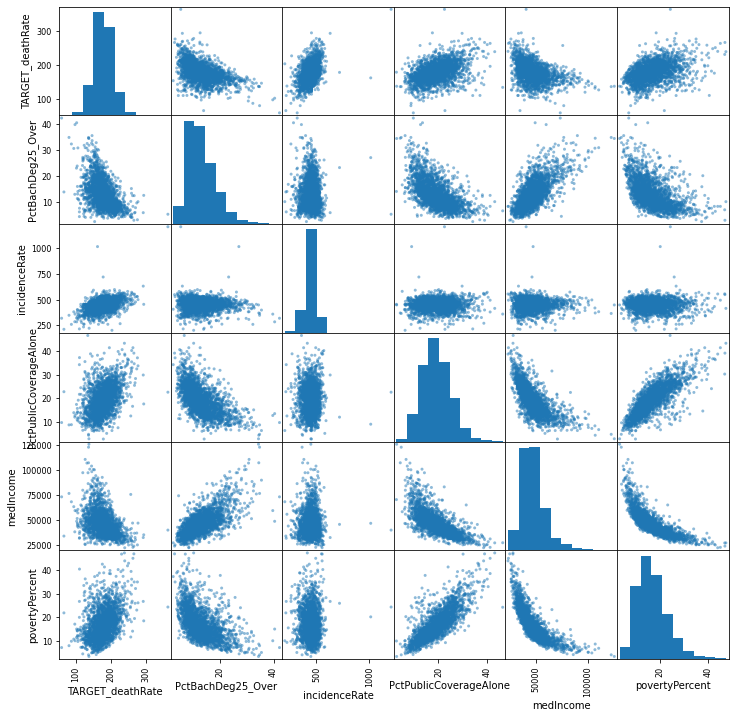

In [11]:
#Plot the scatterplot
pd.plotting.scatter_matrix(training_all_df[top_features], figsize=(12, 12))
plt.show()

In [12]:
training_all_df[['TARGET_deathRate','PctBachDeg25_Over','incidenceRate','PctPublicCoverageAlone',
             'medIncome','povertyPercent']].corr()

,TARGET_deathRate,PctBachDeg25_Over,incidenceRate,PctPublicCoverageAlone,medIncome,povertyPercent
TARGET_deathRate,1.000000,-0.491411,0.443983,0.439734,-0.416607,0.413260
PctBachDeg25_Over,-0.491411,1.000000,-0.024455,-0.599208,0.691206,-0.519242
incidenceRate,0.443983,-0.024455,1.000000,0.023177,0.019830,-0.010297
PctPublicCoverageAlone,0.439734,-0.599208,0.023177,1.000000,-0.709009,0.791595
medIncome,-0.416607,0.691206,0.019830,-0.709009,1.000000,-0.784652
povertyPercent,0.413260,-0.519242,-0.010297,0.791595,-0.784652,1.000000


Based on the above correlation matrix, we can identify two sets of features that show visible correlations to each other:
1. **PctPublicCoverageAlone** and **povertyPercent**: The correlation coefficient between **PctPublicCoverageAlone** and **povertyPercent** is 0.791595, indicating a **strong positive correlation**. This means that there is a strong relationship between the percentage of the population covered by the government provided health insurance alone and the poverty rate. Higher poverty rates tend to be associated with a higher percentage of the population relying on public health coverage alone, indicating a potential dependence on government support for healthcare access.
2. **medIncome** and **povertyPercent**: The correlation coefficient between **medIncome** and **povertyPercent** is -0.784652, indicates a **strong negative correlation**. This shows an inverse relationship between median income levels and the poverty rate. Higher median income levels tend to be associated with lower poverty rates, which means that the County's with higher income levels experience lower poverty rates.
These correlations emphasize the connection between socioeconomic factors and health outcomes. They indicate that higher poverty rates are often linked to a greater reliance on public health coverage alone, while higher median income levels are associated with lower poverty rates.


In [13]:
#Split the dataset into training and test sets

from sklearn.model_selection import train_test_split

train_set, test_set, train_set_labels, test_set_labels  = train_test_split(training_df, training_targets_df['TARGET_deathRate'], 
                                                                           test_size= 0.2, random_state=42)

In [14]:
#Find missing values in the dataset

print(train_set.isnull().sum())

avgAnnCount                   0
avgDeathsPerYear              0
incidenceRate                 0
medIncome                     0
popEst2015                    0
povertyPercent                0
studyPerCap                   0
MedianAge                     0
MedianAgeMale                 0
MedianAgeFemale               0
AvgHouseholdSize              0
PercentMarried                0
PctNoHS18_24                  0
PctHS18_24                    0
PctSomeCol18_24            1464
PctBachDeg18_24               0
PctHS25_Over                  0
PctBachDeg25_Over             0
PctEmployed16_Over           93
PctUnemployed16_Over          0
PctPrivateCoverage            0
PctPrivateCoverageAlone     395
PctEmpPrivCoverage            0
PctPublicCoverage             0
PctPublicCoverageAlone        0
PctWhite                      0
PctBlack                      0
PctAsian                      0
PctOtherRace                  0
PctMarriedHouseholds          0
BirthRate                     0
dtype: i

We were able to find missing values in the training dataset for the following features:

- **PctSomeCol18_24**: 1464 missing values
- **PctEmployed16_Over**: 93 missing values
- **PctPrivateCoverageAlone**: 395 missing values

We have to handle the missing values appropriately before doing any analysis on the data.

In [15]:
print(train_set[['PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24']][train_set['PctSomeCol18_24'].notnull()])

      PctNoHS18_24  PctHS18_24  PctSomeCol18_24  PctBachDeg18_24
2032           8.2        33.8             50.5              7.5
651           16.3        28.5             53.9              1.3
1637          13.1        38.8             38.4              9.7
1850          12.7        30.5             50.1              6.7
1112           6.4        23.3             59.7             10.7
...            ...         ...              ...              ...
2047           9.5        48.4             37.3              4.8
2300           9.3        36.1             43.0             11.6
459           48.9        43.9              7.1              0.0
955           15.2        35.5             43.7              5.6
1482          21.2        42.3             35.4              1.0

[486 rows x 4 columns]


In [16]:
import numpy as np

# Select only the rows where PctSomeCol18_24 is not null
high_edu = train_set[train_set['PctSomeCol18_24'].notnull()]

# Create an array containing the sum of the selected columns
tot_per = np.sum(high_edu[['PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24']].values, axis=1)

print(tot_per[0:20])

[100.  100.  100.  100.  100.1  99.9 100.1  99.9 100.  100.  100.  100.
 100.1 100.  100.  100.  100.  100.1 100.   99.9]


In [17]:

from sklearn.base import BaseEstimator

class HighestEducation(BaseEstimator):

    def __init__(self):
        pass
        
    def fit(self, X, y=None):
        # We don't transform the target values here
        return self
    
    def transform(self, X, y=None):
        X['PctSomeCol18_24'] = X['PctSomeCol18_24'].fillna(100 - 
                                (X['PctNoHS18_24'] + X['PctHS18_24'] + X['PctBachDeg18_24']))
        return X

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Create a pipeline for the numerical columns
num_pipeline = Pipeline([
    ('highest_edu',HighestEducation()),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])


# Fit and transform tShe numerical columns for the training set
train_set_transformed = num_pipeline.fit_transform(train_set)

# Fit and transform the numerical columns for the test set
test_set_transformed = num_pipeline.transform(test_set)

To pre-process the training data and create an ML pipeline using scikit-learn, the following steps were performed:
1.	The dataset was split into training and test sets using 80-20 split, that is training set contains 80% of the data while the test set contains 20% of the data.
2.	The isnull().sum() method was used to identify the number of missing values in each column. We observe that 'PctSomeCol18_24' has 1464 missing values, 'PctEmployed16_Over' has 93 missing values, and 'PctPrivateCoverageAlone' has 395 missing values.
3.	The missing values of 'PctPrivateCoverageAlone' and 'PctEmployed16_Over' was handled by replacing the missing values in that column with the median value of the column.
4.	The HighestEducation class is defined as a custom transformer by inheriting from BaseEstimator. This transformer is responsible for handling missing values in the 'PctSomeCol18_24' column. On analysing the data, we find that all the columns with the percentage of County residents between 18-24 years with a particular highest education, that is columns  'PctNoHS18_24', 'PctHS18_24', 'PctSomeCol18_24', 'PctBachDeg18_24' sum to 100. This logic was used to replace the missing values in the 'PctSomeCol18_24' column.
5.	A pipeline was created for numerical data with HighestEducation transformer, SimpleImputer for filling missing values with the median, and StandardScaler for standardizing the numerical features.
6.	The fit_transform() method is called to fit and transform the numerical columns of the training set and the transform() method is used to transform the numerical columns of the test set.

#### Ordinary least squares (OLS) Model

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# OLS model
ols_model = LinearRegression()
ols_model.fit(train_set_transformed, train_set_labels)

LinearRegression()

#### The evaluation metrics for the OLS model 

In [20]:
# OLS model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score

ols_preds = ols_model.predict(test_set_transformed)

# Calculate RMSE and MAE
ols_mse = mean_squared_error(test_set_labels, ols_preds)
ols_rmse = np.sqrt(mean_squared_error(test_set_labels, ols_preds))
ols_mae = mean_absolute_error(test_set_labels, ols_preds)
ols_r2score = r2_score(test_set_labels, ols_preds)

# Print the evaluation metrics
print('OLS MSE: %s' % round(ols_mse, 3))
print('OLS RMSE: %s' % round(ols_rmse, 3))
print('OLS MAE: %s' % round(ols_mae, 3))
print('OLS regression score : %s' % round(ols_r2score, 3))

OLS MSE: 350.803
OLS RMSE: 18.73
OLS MAE: 13.78
OLS regression score : 0.574


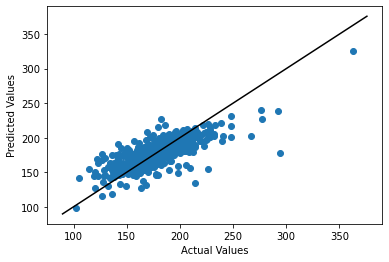

In [21]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values
plt.scatter(test_set_labels, ols_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black')

plt.show()

#### Lasso and Ridge Regression Models

#### Using Ridge Model

In [22]:
# Ridge model
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

# Define the model
ridge_model = Ridge()

# Define the hyperparameter grid
param_grid = {
    'alpha': np.linspace(start=0, stop=50, num=100),
    'fit_intercept': [True, False]
}

# Define the grid search
ridge_gridsearch = GridSearchCV(ridge_model, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=10)

# Fit the grid search to the training data
result_ridge = ridge_gridsearch.fit(train_set_transformed, train_set_labels)

# Print the best score and best hyperparameters
print('Best Score: %s' % round(result_ridge.best_score_, 3))
print('Best Hyperparameters: %s' % result_ridge.best_params_)

Best Score: -19.527
Best Hyperparameters: {'alpha': 32.323232323232325, 'fit_intercept': True}


A grid search is performed to find the best hyperparameters for the Ridge model using the GridSearchCV class. The hyperparameters searched over are the regularization weight, that is alpha and the fit_intercept.

The best negative RMSE score is -19.527 with the alpha value as 32.32 and fit_intercept as 'True'.

#### The evaluation metrics for the Ridge model 

In [23]:
# Ridge model evaluation
ridge_best = result_ridge.best_estimator_
ridge_preds = ridge_best.predict(test_set_transformed)

In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
ridge_mse = mean_squared_error(test_set_labels, ridge_preds)
ridge_rmse = np.sqrt(mean_squared_error(test_set_labels, ridge_preds))
ridge_mae = mean_absolute_error(test_set_labels, ridge_preds)
ridge_r2score = r2_score(test_set_labels, ridge_preds)

# Print the evaluation metrics
print('Ridge MSE: %s' % round(ridge_mse, 3))
print('Ridge RMSE: %s' % round(ridge_rmse, 3))
print('Ridge MAE: %s' % round(ridge_mae, 3))
print('Ridge regression score : %s' % round(ridge_r2score, 3))

Ridge MSE: 350.902
Ridge RMSE: 18.732
Ridge MAE: 13.814
Ridge regression score : 0.574


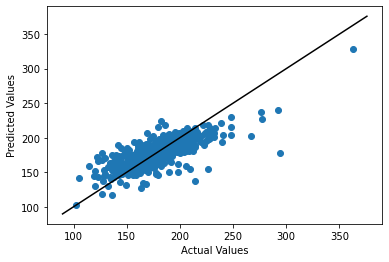

In [25]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values
plt.scatter(test_set_labels, ridge_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black')

plt.show()

#### Using Lasso Model

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

# Define the model
lasso_model = Lasso()

# Define the hyperparameter grid
param_grid = {
    'alpha': np.linspace(start=0, stop=5, num=100),
    'fit_intercept': [True, False]
}

# Define the grid search
lasso_gridsearch = GridSearchCV(lasso_model, param_grid, scoring='neg_root_mean_squared_error', n_jobs=-1, cv=10)

# Fit the grid search to the training data
result_lasso = lasso_gridsearch.fit(train_set_transformed, train_set_labels)

# Print the best score and best hyperparameters
print('Best Score: %s' % round(result_lasso.best_score_, 3))
print('Best Hyperparameters: %s' % result_lasso.best_params_)

Best Score: -19.528
Best Hyperparameters: {'alpha': 0.050505050505050504, 'fit_intercept': True}


Similar to the Ridge model, a grid search is performed to find the best hyperparameters for the Lasso model.

The best negative RMSE score is -19.528 with the alpha value as 0.05 and fit_intercept as 'True'.

#### The evaluation metrics for the Lasso model 

In [27]:
# Ridge model evaluation
lasso_best = result_lasso.best_estimator_
lasso_preds = lasso_best.predict(test_set_transformed)

In [28]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
lasso_mse = mean_squared_error(test_set_labels, lasso_preds)
lasso_rmse = np.sqrt(mean_squared_error(test_set_labels, lasso_preds))
lasso_mae = mean_absolute_error(test_set_labels, lasso_preds)
lasso_r2score = r2_score(test_set_labels, lasso_preds)

# Print the evaluation metrics
print('Lasso MSE: %s' % round(lasso_mse, 3))
print('Lasso RMSE: %s' % round(lasso_rmse, 3))
print('Lasso MAE: %s' % round(lasso_mae, 3))
print('Lasso regression score : %s' % round(lasso_r2score, 3))

Lasso MSE: 350.731
Lasso RMSE: 18.728
Lasso MAE: 13.817
Lasso regression score : 0.574


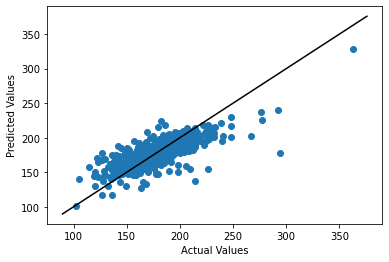

In [29]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values
plt.scatter(test_set_labels, lasso_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black')

plt.show()

#### Comparison of the three models

The Evaluation metrics used to assess the performance of the three regression models (OLS, Ridge, and Lasso)  are **Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE)**, and **R-squared score**. These metrics provide insights into the accuracy and goodness of fit of the models.

In [30]:
#Compare the performance of the different regression models
score = {'Regression Model':['OLS','Ridge','Lasso'], 'MSE Scores':[ols_mse,ridge_mse,lasso_mse], 'RMSE Scores':[ols_rmse,ridge_rmse,lasso_rmse],
         'MAE Scores':[ols_mae,ridge_mae,lasso_mae], 'R2 Scores':[ols_r2score,ridge_r2score,lasso_r2score]}

model_df = pd.DataFrame(score)
model_df

,Regression Model,MSE Scores,RMSE Scores,MAE Scores,R2 Scores
0,OLS,350.803056,18.729737,13.780070,0.573726
1,Ridge,350.902481,18.732391,13.813801,0.573605
2,Lasso,350.730706,18.727806,13.816758,0.573814


Based on the evaluation metrics, the Lasso model achieved the lowest MSE and RMSE scores, indicating better performance in terms of prediction accuracy and model fit. The R2 score is almost the same for all three models, which means that they explain approximately the same amount of variance in the target variable. However, based on the other metrics, the Lasso model is the preferred choice.

Therefore, the **Lasso model is the best performing one** among the OLS, Ridge, and Lasso models for this particular dataset.

In [31]:
# Get the feature names
feature_names = train_set.columns

# Create a dictionary of feature names and their corresponding coefficients
lasso_coef = dict(zip(feature_names, np.abs(lasso_best.coef_)))

# Sort the dictionary in descending order of absolute coefficient values
sorted_coef = dict(sorted(lasso_coef.items(), key=lambda item: abs(item[1]), reverse=True))

# Print out the top five most important/relevant features and their corresponding coefficients
display(Markdown("**Top five most important/relevant features in the desceding order of their importance**"))
for feature, coef in list(sorted_coef.items())[:5]:
    print(feature, ':', coef)

**Top five most important/relevant features in the desceding order of their importance**

incidenceRate : 10.056774077893365
PctBachDeg25_Over : 7.474266536543934
avgDeathsPerYear : 6.578037401208004
PctMarriedHouseholds : 6.45174542933246
PctPrivateCoverage : 6.092240715464621


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {'n_estimators': [3, 10, 30, 50, 100],
              'max_features': [2, 4, 6, 8, 10],
              'bootstrap': [True, False],
              'max_depth' : [10, 20, 30]
             }

# Define the model
rf = RandomForestRegressor(random_state=42)

# Define the grid search
rf_gridsearch = GridSearchCV(rf, param_grid, cv=10, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the grid search to the training data
result_rf = rf_gridsearch.fit(train_set_transformed, train_set_labels)

# Print the best score and best hyperparameters
print('Best Score: %s' % round(result_rf.best_score_, 3))
print('Best Hyperparameters: %s' % result_rf.best_params_)

Best Score: -347.838
Best Hyperparameters: {'bootstrap': False, 'max_depth': 20, 'max_features': 10, 'n_estimators': 50}


In [33]:
# Random Forest model evaluation
rf_best = result_rf.best_estimator_
rf_preds = rf_best.predict(test_set_transformed)

In [34]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
rf_mse = mean_squared_error(test_set_labels, rf_preds)
rf_rmse = np.sqrt(mean_squared_error(test_set_labels, rf_preds))
rf_mae = mean_absolute_error(test_set_labels, rf_preds)
rf_r2score = r2_score(test_set_labels, rf_preds)

# Print the evaluation metrics
print('Random Forest MSE: %s' % round(rf_mse, 3))
print('Random Forest RMSE: %s' % round(rf_rmse, 3))
print('Random Forest MAE: %s' % round(rf_mae, 3))
print('Random Forest regression score : %s' % round(rf_r2score, 3))

Random Forest MSE: 382.705
Random Forest RMSE: 19.563
Random Forest MAE: 13.954
Random Forest regression score : 0.535


#### Comparison of the Random Forest regression model with the best linear regression model (Lasso) 

Based on the evaluation metrics, the best performing model is the best linear regression model (Lasso) identified previously. Here are the comparison results with the Random Forest regression model:

**Best Linear Regression Model (Lasso)**:

- MSE: 350.731
- RMSE: 18.728
- MAE: 13.817
- R2 Score: 0.574

**Random Forest Regression Model**:

- MSE: 382.705
- RMSE: 19.563
- MAE: 13.954
- R2 Score: 0.535

Comparing these results, the best linear regression model (Lasso) outperforms the Random Forest regression model. It has lower MSE, RMSE, and MAE values, indicating better prediction accuracy and model fit. Also, the R2 score is higher for the Lasso model, indicating a better explanation of variance in the target variable.

Therefore, based on the evaluation metrics, the best linear regression model, that is **Lasso Model** provides better results compared to the Random Forest regression model for this particular dataset.

In [35]:
# Extract important features from the best model
importances = rf_best.feature_importances_
feature_names = train_set.columns

# Create a DataFrame with feature names and their importance scores
df_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the features by importance score in descending order
df_importances = df_importances.sort_values('Importance', ascending=False).reset_index(drop=True).head(5)

# Print the top five most important features
display(Markdown("**Top 5 Most Important Features**"))
print(df_importances.to_string(index=False))

**Top 5 Most Important Features**

               Feature  Importance
         incidenceRate    0.150626
     PctBachDeg25_Over    0.114897
PctPublicCoverageAlone    0.068386
             medIncome    0.060660
          PctHS25_Over    0.059490


In [36]:
## Read in the provided example test data
test_data_path = data_dir + 'Test_data_example.csv'
test_targets_path = data_dir + 'Test_data_example_targets.csv'

test_data = pd.read_csv(test_data_path)
test_targets = pd.read_csv(test_targets_path)

In [37]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avgAnnCount              30 non-null     float64
 1   avgDeathsPerYear         30 non-null     int64  
 2   incidenceRate            30 non-null     float64
 3   medIncome                30 non-null     int64  
 4   popEst2015               30 non-null     int64  
 5   povertyPercent           30 non-null     float64
 6   studyPerCap              30 non-null     float64
 7   MedianAge                30 non-null     float64
 8   MedianAgeMale            30 non-null     float64
 9   MedianAgeFemale          30 non-null     float64
 10  AvgHouseholdSize         30 non-null     float64
 11  PercentMarried           30 non-null     float64
 12  PctNoHS18_24             30 non-null     float64
 13  PctHS18_24               30 non-null     float64
 14  PctSomeCol18_24          3 n

In [38]:
# Fit and transform the entire training data
train_data_transformed = num_pipeline.fit_transform(training_df)

# Transform the unseen test data
test_data_transformed = num_pipeline.transform(test_data)

In [39]:
best_model_final = lasso_best.fit(train_data_transformed, training_targets_df['TARGET_deathRate'])
best_model_preds = lasso_best.predict(test_data_transformed)

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calculate RMSE and MAE
best_lasso_mse = mean_squared_error(test_targets['TARGET_deathRate'], best_model_preds)
best_lasso_rmse = np.sqrt(mean_squared_error(test_targets['TARGET_deathRate'], best_model_preds))
best_lasso_mae = mean_absolute_error(test_targets['TARGET_deathRate'], best_model_preds)
best_lasso_r2score = r2_score(test_targets['TARGET_deathRate'], best_model_preds)

# Print the evaluation metrics
print('Best Lasso MSE: %s' % round(best_lasso_mse, 3))
print('Best Lasso RMSE: %s' % round(best_lasso_rmse, 3))
print('Best Lasso MAE: %s' % round(best_lasso_mae, 3))
print('Best Lasso regression score : %s' % round(best_lasso_r2score, 3))

Best Lasso MSE: 523.892
Best Lasso RMSE: 22.889
Best Lasso MAE: 17.136
Best Lasso regression score : 0.308


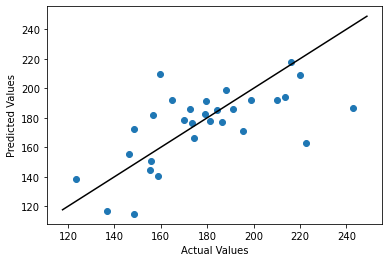

In [41]:
import matplotlib.pyplot as plt

# Create a scatter plot of predicted vs actual values
plt.scatter(test_targets['TARGET_deathRate'], best_model_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

x = np.linspace(*plt.xlim())
plt.plot(x, x, color='black')

plt.show()

The best performing lasso model was used to evalute the unseen test dataset.

# **Classification of 1-year patient mortality following a heart attack**

The provided data set contains data from patients who all suffered heart attacks at some point in the past. Some are still alive and some are not. The data provided contains key clinical information (features) for each patient and the prediction task involves identifying (classifying) which patients are likely to survive for at least one year following the heart attack.
The provided features (clinical variables) to be used as predictors by your classification models include the following:

    1. age-at-heart-attack -- age in years when heart attack occurred
    2. pericardial-effusion -- binary. Pericardial effusion is fluid
			      around the heart.  0=no fluid, 1=fluid
    3. fractional-shortening -- a measure of contracility around the heart
			       lower numbers are increasingly abnormal
    4. epss -- E-point septal separation, another measure of contractility.  
	      Larger numbers are increasingly abnormal.
    5. lvdd -- left ventricular end-diastolic dimension.  This is
	      a measure of the size of the heart at end-diastole.
	      Large hearts tend to be sick hearts.

    6. wall-motion-index -- equals wall-motion-score divided by number of
			   segments seen.  Usually 12-13 segments are seen
			   in an echocardiogram.  
               
The target variable is encoded as a binary outcome of whether a patient survived for 1 year post-heart attack or not. Label '0' indicates that the patient died within one year of a heart attack. Label '1' indicates that the patient survived for at least one year after a heart attack.

In [42]:
root_dir = './'
local_path = 'Data-for-students-classification/' # store the related data files in this folder
data_dir = root_dir + local_path

data_features_path = data_dir + 'Heart-attack-data-predictors.csv'
data_targets_path = data_dir + 'Heart-attack-data-targets.csv'

In [43]:
heart_data_features = pd.read_csv(data_features_path)
heart_data_targets = pd.read_csv(data_targets_path)

In [44]:
heart_data_features.head(10)

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
0,71.0,0,0.260,9.000,4.600,1.000
1,72.0,0,0.380,6.000,4.100,1.700
2,55.0,0,0.260,4.000,3.420,1.000
3,60.0,0,0.253,12.062,4.603,1.450
4,57.0,0,0.160,22.000,5.750,2.250
5,68.0,0,0.260,5.000,4.310,1.000
6,62.0,0,0.230,31.000,5.430,1.875
7,60.0,0,0.330,8.000,5.250,1.000
8,46.0,0,0.340,0.000,5.090,1.140
9,54.0,0,0.140,13.000,4.490,1.190


In [45]:
heart_data_features.describe()

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
count,126.000000,131.000000,124.000000,117.000000,121.000000,130.00000
mean,62.813722,0.183206,0.216734,12.164769,4.763157,1.37800
std,8.342110,0.388320,0.107513,7.370159,0.810013,0.45185
min,35.000000,0.000000,0.010000,0.000000,2.320000,1.00000
25%,57.000000,0.000000,0.150000,7.000000,4.230000,1.00000
50%,62.000000,0.000000,0.205000,11.000000,4.650000,1.21600
75%,67.750000,0.000000,0.270000,16.100000,5.300000,1.50750
max,86.000000,1.000000,0.610000,40.000000,6.780000,3.00000


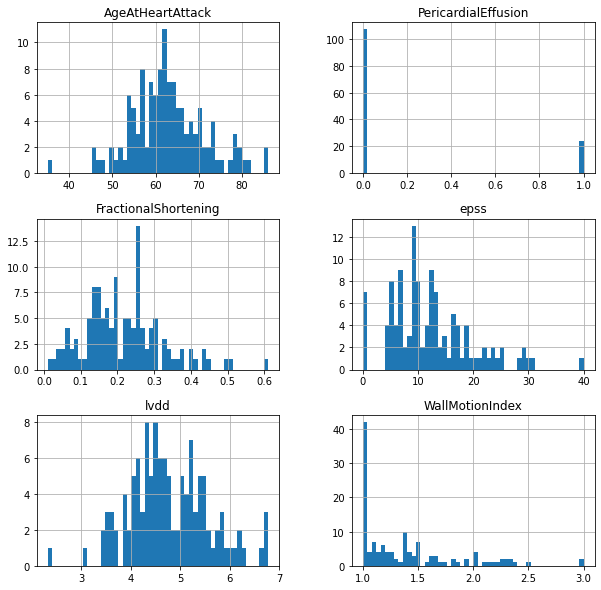

In [46]:
%matplotlib inline
import matplotlib.pyplot as pl

heart_data_features.hist(bins=50,figsize=(10,10))
plt.show()

#### Observations from the histograms

The histograms show the presence of outliers in the following features - **AgeAtHeartAttack, FractionalShortening, epss, lvdd** and **WallMotionIndex**. Outliers are data points in the histogram which deviate greatly from the majority of the data and may have an impact on the analysis.

In [47]:
heart_data_features[(heart_data_features["AgeAtHeartAttack"] < 40) | (heart_data_features["AgeAtHeartAttack"] > 80)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
21,85.0,1,0.180,19.0,5.46,1.38
26,35.0,0,0.300,5.0,4.17,1.00
46,81.0,0,0.120,NaN,NaN,1.25
69,86.0,0,0.225,12.2,5.20,2.18


On further analysing the feature **'AgeAtHeartAttack'**, the values didn't appear to be significantly deviating from the expected range. Therefore, no action was taken to handle these values as outliers.

In [48]:
heart_data_features[(heart_data_features["FractionalShortening"] > 0.45)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
35,61.0,0,0.61,13.1,4.07,1.625
38,68.0,0,0.51,NaN,3.88,1.670
96,59.0,0,0.50,9.1,3.42,1.500


In [49]:
# Calculate the 5th and 95th percentiles of the FractionalShortening column
p5 = heart_data_features["FractionalShortening"].quantile(0.0)
p95 = heart_data_features["FractionalShortening"].quantile(0.95)

# Cap and floor the FractionalShortening column using the percentiles
heart_data_features["FractionalShortening"] = heart_data_features["FractionalShortening"].clip(p5, p95)

In [50]:
heart_data_features[(heart_data_features["epss"] < 3) |(heart_data_features["epss"] > 30)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
6,62.0,0,0.23,31.0,5.43,1.875
8,46.0,0,0.34,0.0,5.09,1.140
23,71.0,0,0.17,0.0,4.65,1.000
73,50.0,0,0.06,30.1,5.95,2.390
101,70.0,0,0.38,0.0,4.55,1.000
107,78.0,0,0.23,40.0,6.23,1.400
115,NaN,0,0.26,0.0,4.38,1.000
120,57.0,1,0.12,0.0,2.32,1.375
121,61.0,0,0.18,0.0,4.48,1.375
130,62.0,0,0.15,0.0,4.51,1.409


In [51]:
# Calculate the 5th and 95th percentiles of the FractionalShortening column
p5 = heart_data_features["epss"].quantile(0.10)
p95 = heart_data_features["epss"].quantile(0.95)

# Cap and floor the FractionalShortening column using the percentiles
heart_data_features["epss"] = heart_data_features["epss"].clip(p5, p95)

In [52]:
heart_data_features[(heart_data_features["lvdd"] > 6.5)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
60,73.0,0,0.12,NaN,6.78,1.39
79,65.0,0,0.06,23.60,6.74,1.09
98,58.0,0,0.17,26.12,6.73,2.01
114,62.0,1,0.19,26.12,6.63,1.95


In [53]:
heart_data_features[(heart_data_features["lvdd"] < 3.5)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
2,55.0,0,0.2600,5.00,3.42,1.000
24,64.0,0,0.1900,5.90,3.48,1.110
33,47.0,0,0.4000,5.12,3.10,1.000
52,58.0,0,0.3000,9.40,3.49,1.000
96,59.0,0,0.4085,9.10,3.42,1.500
120,57.0,1,0.1200,5.00,2.32,1.375


In [54]:
# Calculate the 5th and 95th percentiles of the FractionalShortening column
p5 = heart_data_features["lvdd"].quantile(0.05)
p95 = heart_data_features["lvdd"].quantile(0.95)

# Cap and floor the FractionalShortening column using the percentiles
heart_data_features["lvdd"] = heart_data_features["lvdd"].clip(p5, p95)

In [55]:
heart_data_features[(heart_data_features["WallMotionIndex"] > 2.5)]

,AgeAtHeartAttack,PericardialEffusion,FractionalShortening,epss,lvdd,WallMotionIndex
32,NaN,0,NaN,12.0,NaN,3.0
53,60.0,0,0.01,24.6,5.65,3.0


In [56]:
# Calculate the 5th and 95th percentiles of the FractionalShortening column
p5 = heart_data_features["WallMotionIndex"].quantile(0.0)
p95 = heart_data_features["WallMotionIndex"].quantile(0.95)

# Cap and floor the FractionalShortening column using the percentiles
heart_data_features["WallMotionIndex"] = heart_data_features["WallMotionIndex"].clip(p5, p95)

For the remaining features with identified outliers, that is, **'FractionalShortening', 'epss', 'lvdd'**, and **'WallMotionIndex'**, capping and flooring was used to handle the outliers. By doing this, extreme values that may have skewed the distribution are replaced with more reasonable values within the defined range.

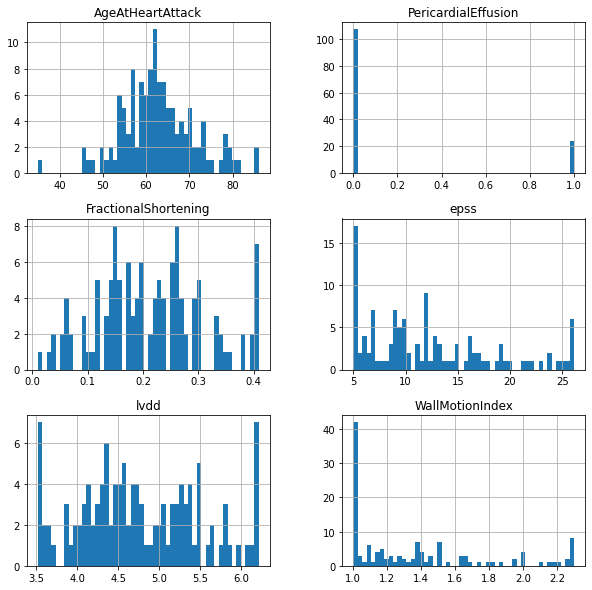

In [57]:
%matplotlib inline
import matplotlib.pyplot as plt

heart_data_features.hist(bins=50,figsize=(10,10))
plt.show()

Now the data looks much cleaner and more suitable for analysis.

In [58]:
heart_data_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131 entries, 0 to 130
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   AgeAtHeartAttack      126 non-null    float64
 1   PericardialEffusion   131 non-null    int64  
 2   FractionalShortening  124 non-null    float64
 3   epss                  117 non-null    float64
 4   lvdd                  121 non-null    float64
 5   WallMotionIndex       130 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 6.3 KB


In [59]:
print(heart_data_features.isnull().sum())

AgeAtHeartAttack         5
PericardialEffusion      0
FractionalShortening     7
epss                    14
lvdd                    10
WallMotionIndex          1
dtype: int64


In [60]:
class DataFrameSelector(BaseEstimator):
    
    def __init__(self, features_names):
        self.features_names= features_names
        
    def fit(self,X, y = None):
        return self
    
    def transform(self, X):
        return X[self.features_names].values

In [61]:
numerical_features=list(heart_data_features)
numerical_features.remove("PericardialEffusion")
categorical_features=["PericardialEffusion"]

numerical_pipeline= Pipeline([
    ('selector', DataFrameSelector(numerical_features)),
    ('imputer',SimpleImputer(strategy="median")),
    ('std_scaler',StandardScaler())
])

categorical_pipeline = Pipeline([
    ('selector',DataFrameSelector(categorical_features))
])

In [62]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ("numerical_pipeline",numerical_pipeline),
    ("categorical_pipeline",categorical_pipeline)
])

In [63]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(heart_data_features, heart_data_targets, test_size=0.3, random_state=42)

In [64]:
# Fit and transform the numerical columns
X_train_transformed = full_pipeline.fit_transform(X_train)

# Fit and transform the numerical columns
X_test_transformed = full_pipeline.transform(X_test)

To pre-process the training data and create an ML pipeline using scikit-learn, the following steps were performed:

1. Missing values were identified for most of the features except 'PericardialEffusion', and this was handled by replacing the missing values with the median value of the column.
2. The dataset was split into training and test sets using 70-30 split.
2. Two separate pipelines were created for numerical and categorical data. The fit_transform() method is called  to fit and transform the columns of the training set and the transform() method is used to transform the columns of the test set.

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

# Train logistic regression without regularization
logreg = LogisticRegression(penalty='none', max_iter=1000, random_state=42)
logreg.fit(X_train_transformed, y_train['Target-class'])
y_pred = logreg.predict(X_test_transformed)
print("Accuracy without regularization:", accuracy_score(y_test, y_pred))
print("F1 score without regularization: {:.3f}".format(f1_score(y_test, y_pred)))

Accuracy without regularization: 0.725
F1 score without regularization: 0.353


In [66]:
# Train logistic regression with L1 regularization
logreg_l1 = LogisticRegression(penalty='l1', solver='saga', max_iter=1000, C=0.2, random_state=42)
logreg_l1.fit(X_train_transformed, y_train['Target-class'])
y_pred_l1 = logreg_l1.predict(X_test_transformed)
print("Accuracy with L1 regularization:", accuracy_score(y_test, y_pred_l1))
print("F1 score with L1 regularization: {:.3f}".format(f1_score(y_test, y_pred_l1)))

Accuracy with L1 regularization: 0.825
F1 score with L1 regularization: 0.462


In [67]:
# Train logistic regression with L2 regularization
logreg_l2 = LogisticRegression(penalty='l2', max_iter=1000, dual=True, solver='liblinear', C=0.2, random_state=42)
logreg_l2.fit(X_train_transformed, y_train['Target-class'])
y_pred_l2 = logreg_l2.predict(X_test_transformed)
print("Accuracy with L2 regularization:", accuracy_score(y_test, y_pred_l2))
print("F1 score with L2 regularization: {:.3f}".format(f1_score(y_test, y_pred_l2)))

Accuracy with L2 regularization: 0.75
F1 score with L2 regularization: 0.375


To evaluate the performance of logistic regression classifiers with and without L1 and L2 regularization, we compared their accuracy and F1 score metrics. Based on these results, **the logistic regression model with L1 regularization performed the best among the three classifiers**. It achieved the highest accuracy of 0.825 and the highest F1 score of 0.462.

In [68]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest classifier
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy', random_state=42, n_jobs=-1, max_features=0.6)

# Train the model
rfc.fit(X_train_transformed, y_train['Target-class'])

# Make predictions on the testing set
y_pred_rfc = rfc.predict(X_test_transformed)

# Evaluate the performance of the model
accuracy = accuracy_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)


print("Random Forest classifier Accuracy:", accuracy)
print("Random Forest classifier  F1 score: {:.3f}".format(f1))

Random Forest classifier Accuracy: 0.775
Random Forest classifier  F1 score: 0.526


Comparing the results, we observe that the Random Forest classifier achieved an accuracy of 0.775. On the other hand, the best logistic regression classifier with L1 regularization achieved an accuracy of 0.825.

Therefore, we can conclude that the **logistic regression classifier with L1 regularization provides the best results** among the two models for this particular task. 

In [69]:
# Get the feature importances
rfc_importances = rfc.feature_importances_
train_trans_cols = ['AgeAtHeartAttack','FractionalShortening','epss','lvdd','WallMotionIndex','PericardialEffusion']

# Get the indices of the features sorted in descending order of importance
sorted_idx = rfc_importances.argsort()[::-1]

# Print the top 5 most important features
display(Markdown("**Top 5 most important features**"))
for i in range(5):
    print(f"{i+1}. {train_trans_cols[sorted_idx[i]]} ({rfc_importances[sorted_idx[i]]:.4f})")

**Top 5 most important features**

1. lvdd (0.2223)
2. WallMotionIndex (0.2099)
3. epss (0.1894)
4. FractionalShortening (0.1746)
5. AgeAtHeartAttack (0.1691)
